# K-means applied to an air quality dataset.


## Description of the Data

The data used were extracted from the following link: [https://datos.jalisco.gob.mx/dataset/bases-de-datos-historicas-de-la-calidad-del-aire](https://datos.jalisco.gob.mx/dataset/bases-de-datos-historicas-de-la-calidad-del-aire). This data contains measurements on air quality for the metropolitan area of Guadalajara from 2016. This dataset includes the following columns:

- **Date**: The date when the air quality data was recorded.
- **Time**: The time when the air quality data was sampled.
- **CO**: Carbon Monoxide.
- **NOX**: Nitrogen Oxides.
- **NO**: Nitric Oxide.
- **NO2**: Nitrogen Dioxide.
- **O3**: Ozone.
- **PM10**: Particles smaller than 10 micrometers.
- **SO2**: Sulfur Dioxide.
- **Temperature**: Temperature.
- **Relative Humidity**: Relative humidity present in the environment at that time.
- **Wind Speed**: Wind speed present at that time.
- **Wind Direction**: Wind direction present at that time.
- **Solar Radiation**: Solar radiation present at that time.




## Importing and Exploring Data

The data is in a .csv file, and to import it, we need the pandas library, using the `read_csv` function. We will use pandas for the general handling of our dataset. We also import some other libraries such as matplotlib for creating plots and `sklearn.cluster` for implementing KMeans.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Raw_DataSet = pd.read_csv('air_quality_metropolitan_area_guadalajara.csv')
Raw_DataSet.head()

,Fecha,Hora,O3,NO,NO2,NOX,SO2,CO,PM10,Temp Ext,RH,WS,WD,Pr,RS,CASETA
0,01/01/2014,00:00,0.003,0.103,0.017,0.121,0.005,3.644,90.4,21.8,13.6,86.8,1.1,251.6,ND,ATM
1,01/01/2014,01:00,0.002,0.111,0.016,0.128,0.005,3.439,94.1,21.8,13.5,87,1.7,231.2,ND,ATM
2,01/01/2014,02:00,0.002,0.131,0.015,0.147,0.005,3.842,89.4,21.8,13.3,88.4,0.6,214.2,ND,ATM
3,01/01/2014,03:00,0.002,0.105,0.014,0.121,0.005,3.245,84.5,21.8,13.2,89,1.1,170.1,ND,ATM
4,01/01/2014,04:00,0.002,0.048,0.014,0.064,0.004,1.926,57.7,21.8,13.1,90.1,0.4,136.1,ND,ATM


In [2]:
Raw_DataSet.describe()

,Fecha,Hora,O3,NO,NO2,NOX,SO2,CO,PM10,Temp Ext,RH,WS,WD,Pr,RS,CASETA
count,87600,87600,87600,87600,87600,87600,87600,87600,87600,87600,87600,87600,87600,87598,87600,87600
unique,365,24,130,411,126,459,43,4174,9067,2959,1088,2987,3047,3488,4672,10
top,26/10/2014,02:00,0.001,ND,ND,ND,0.002,ND,ND,ND,ND,0,ND,ND,ND,ATM
freq,243,3653,6826,6939,6932,6939,20776,14120,6116,21828,17018,2711,13919,28799,74454,8760


## Dataset Preprocessing

To use our information with the KMeans algorithm, we need to prepare our data.

The first step is to remove columns that are not relevant for our training set. In this case, we remove the following columns: Fecha, Hora, Temp Ext, RH, WS, WD, Pr, RS, CASETA.



In [3]:
#We remove columns
DataSet = Raw_DataSet.drop(['Fecha','Hora','Temp Ext','RH','WS','WD','Pr','RS','CASETA'],axis=1)
DataSet.head()
DataSet.describe()

,O3,NO,NO2,NOX,SO2,CO,PM10
count,87600,87600,87600,87600,87600,87600,87600
unique,130,411,126,459,43,4174,9067
top,0.001,ND,ND,ND,0.002,ND,ND
freq,6826,6939,6932,6939,20776,14120,6116


We need to remove duplicate rows and rows with null values. To do this, we use the `dropna` and `drop_duplicates` functions. There are some values in our data marked as 'ND' that the `dropna` function cannot remove, so we replace those values with `None`.

> Add blockquote



In [4]:
#We remove rows with empty data and duplicate rows.
filter_O3 = DataSet["O3"] == "ND"
filter_NO = DataSet["NO"] == "ND"
filter_NO2 = DataSet["NO2"]  == "ND"
filter_NOX = DataSet["NOX"]   == "ND"
filter_SO2 = DataSet["SO2"]   == "ND"
filter_CO = DataSet["CO"]   == "ND"
filter_PM10 = DataSet["PM10"]   == "ND"

DataSet[filter_O3] = None
DataSet[filter_NO] = None
DataSet[filter_NO2] = None
DataSet[filter_NOX] = None
DataSet[filter_SO2] = None
DataSet[filter_CO] = None
DataSet[filter_PM10] = None

DataSet.dropna(inplace = True)
DataSet.drop_duplicates(inplace = True)
#We convert our data to float.
DataSet[["O3","NO","NO2","NOX","SO2","CO","PM10"]] = DataSet[["O3","NO","NO2","NOX","SO2","CO","PM10"]].astype(float)
DataSet.describe()

,O3,NO,NO2,NOX,SO2,CO,PM10
count,59736.000000,59736.000000,59736.000000,59736.000000,59736.000000,59736.000000,59736.000000
mean,0.019867,0.025277,0.020226,0.045770,0.002550,0.919158,53.607794
std,0.017703,0.042777,0.013433,0.051445,0.002105,0.769257,47.017675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.200000
25%,0.005000,0.004000,0.011000,0.016000,0.001000,0.465000,24.700000
50%,0.016000,0.009000,0.017000,0.028000,0.002000,0.689000,39.600000
75%,0.030000,0.025000,0.026000,0.054000,0.003000,1.093000,65.930000
max,0.136000,0.511000,0.167000,0.542000,0.028000,11.651000,714.200000


## Data Visualization


### Correlation Matrix


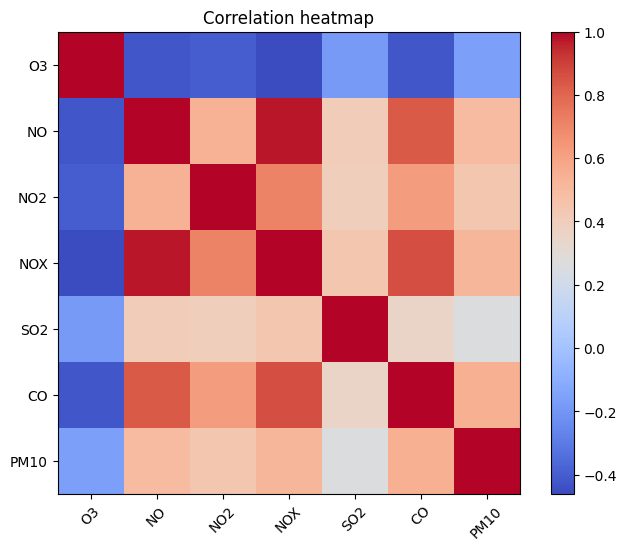

In [5]:
correlation_matrix = DataSet.corr()
columns = ["O3", "NO", "NO2", "NOX", "SO2", "CO", "PM10"]
# Create the heatmap.
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation heatmap')
plt.colorbar(heatmap)
# X and Y axis labels.
plt.xticks(range(len(columns)), columns, rotation=45)
plt.yticks(range(len(columns)), columns)
# Show heatmap
plt.show()

### Histograms

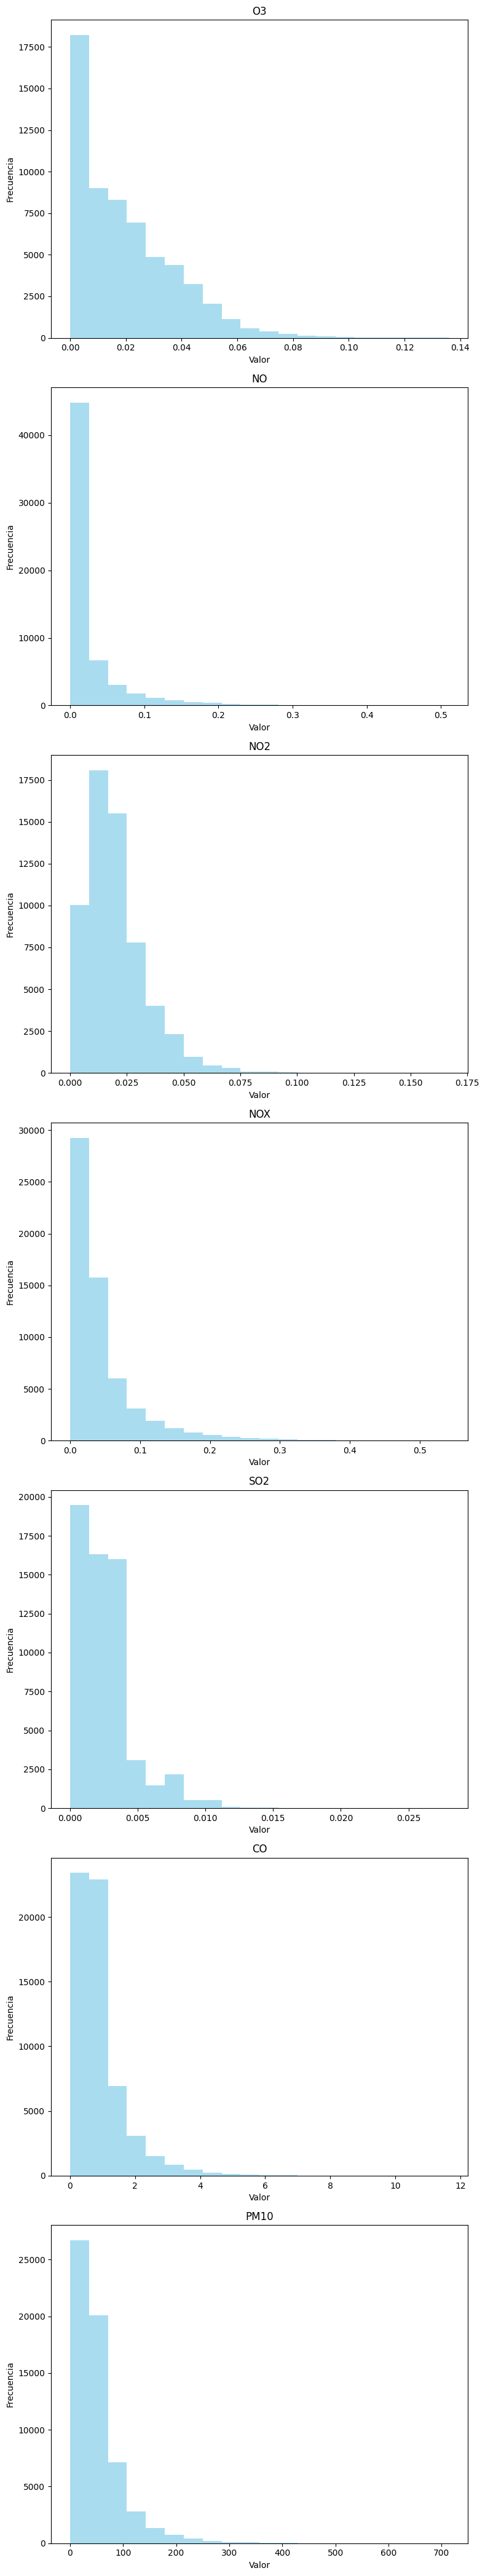

In [6]:
# Create a figure and axes.
fig, ax = plt.subplots(len(columns), 1, figsize=(8, 6*len(columns)))

# Generate histograms for each column.
for i, column in enumerate(columns):
    ax[i].hist(DataSet[column].dropna(), bins=20, color='skyblue', alpha=0.7)
    ax[i].set_title(column)
    ax[i].set_xlabel('Valor')
    ax[i].set_ylabel('Frecuencia')

# Adjust the space between subplots.
plt.tight_layout()

# Show the figure with all the histograms.
plt.show()

## Data Transformation

We will use two techniques to scale our data: we will create one dataset with standardized data and another using the `MinMax()` function. This is to compare the performance of the two techniques.


In [7]:
# Data transformation.
from sklearn import preprocessing
# Standardize data.
columns = DataSet.columns
Stand = preprocessing.StandardScaler()
Stand.fit(DataSet)
Array_Stand = Stand.transform(DataSet)
DataSet_Stand = pd.DataFrame(Array_Stand,columns=columns)
# Scale data with MinMax.
MinMax = preprocessing.MinMaxScaler()
MinMax.fit(DataSet)
Array_MinMax = MinMax.transform(DataSet)
DataSet_MinMax = pd.DataFrame(Array_MinMax,columns=columns)
print(DataSet_Stand.head())
print(DataSet_MinMax.head())

         O3        NO       NO2       NOX       SO2        CO      PM10
0 -0.952806  1.816966 -0.240170  1.462362  1.163754  3.542204  0.782525
1 -1.009295  2.003986 -0.314612  1.598431  1.163754  3.275711  0.861220
2 -1.009295  2.471536 -0.389054  1.967763  1.163754  3.799597  0.761256
3 -1.009295  1.863721 -0.463496  1.462362  1.163754  3.023517  0.657039
4 -1.009295  0.531203 -0.463496  0.354367  0.688716  1.308861  0.087036
         O3        NO       NO2       NOX       SO2        CO      PM10
0  0.022059  0.201566  0.101796  0.223247  0.178571  0.312468  0.126331
1  0.014706  0.217221  0.095808  0.236162  0.178571  0.294865  0.131513
2  0.014706  0.256360  0.089820  0.271218  0.178571  0.329469  0.124930
3  0.014706  0.205479  0.083832  0.223247  0.178571  0.278207  0.118067
4  0.014706  0.093933  0.083832  0.118081  0.142857  0.164949  0.080532


## Creating and Evaluating Our K-Means Model

After preparing our data, we will create our models with the two datasets: `DataSet_Stand` and `DataSet_MinMax`.

To select the appropriate number of clusters, we will use the elbow method, which involves plotting inertia versus the number of clusters on a line graph. This graph should show a sharp change in the evolution of inertia, with the line resembling the shape of an arm and its elbow.



First, we test with the standardized dataset. The KMeans algorithm returns a metric called inertia, which is the sum of the squared distances of each object in the cluster to its centroid. Lower inertia indicates that the data points are closer to their centroid. We plot inertia against the number of clusters to select the optimal number of clusters for our model. We aim to find a balance between the number of clusters and the inertia.


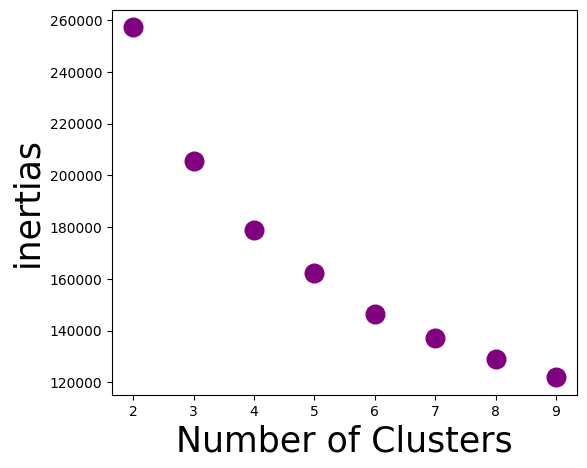

In [8]:
# Implementation of K-means.
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,n_init=10).fit(DataSet_Stand.values)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inertias, marker="o", s=180, color="purple")
plt.xlabel("Number of Clusters", fontsize=25)
plt.ylabel("inertias", fontsize=25)
plt.show()

Ahora realizamos lo mismo con nuestro conjunto escalado con minmax.

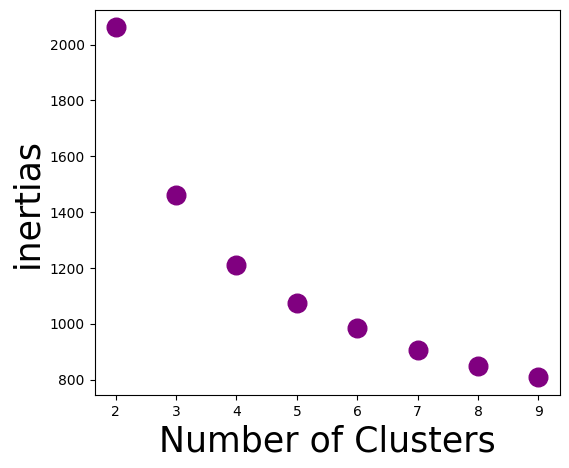

In [9]:
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,n_init=10).fit(DataSet_MinMax.values)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inertias, marker="o", s=180, color="purple")
plt.xlabel("Number of Clusters", fontsize=25)
plt.ylabel("inertias", fontsize=25)
plt.show()

Analyzing the results, our MinMax dataset shows better inertia. Using the previously mentioned elbow method, the optimal number of clusters is 5. Therefore, we will build our model using `DataSet_MinMax` with 5 clusters.


In [10]:
kmeans_Air_Quality = KMeans(n_clusters=5,n_init=10).fit(DataSet_MinMax.values)
kmeans_Air_Quality.inertia_

1072.4725583943182

## Testing and Cluster Separation

Now that we have defined our model, we can perform tests and analyze our clusters.

First, we create a new dataset to assign the corresponding cluster to each record. Then, we create a separate dataset for each cluster, allowing us to analyze them individually.


In [13]:
Test_DataSet= DataSet.copy()
Test_DataSet = Test_DataSet.astype({'O3': 'float64','NO': 'float64','NO2': 'float64','NOX': 'float64','SO2': 'float64','CO': 'float64','PM10': 'float64',})
Test_DataSet['cluster'] = kmeans_Air_Quality.labels_

filter0 = Test_DataSet['cluster'] ==0
filter1 = Test_DataSet['cluster'] ==1
filter2 = Test_DataSet['cluster'] ==2
filter3 = Test_DataSet['cluster'] ==3
filter4 = Test_DataSet['cluster'] ==4

Cluster0 = Test_DataSet[filter0]
Cluster1 = Test_DataSet[filter1]
Cluster2 = Test_DataSet[filter2]
Cluster3 = Test_DataSet[filter3]
Cluster4 = Test_DataSet[filter4]


### Description of Data for Cluster 0


In [14]:
Cluster0.describe()

,O3,NO,NO2,NOX,SO2,CO,PM10,cluster
count,20045.000000,20045.000000,20045.000000,20045.000000,20045.000000,20045.000000,20045.000000,20045.0
mean,0.025880,0.006238,0.012282,0.018475,0.002107,0.508807,38.523913,0.0
std,0.007019,0.005293,0.006682,0.010537,0.001867,0.252430,29.562605,0.0
min,0.009000,0.000000,0.000000,0.000000,0.000000,0.005000,0.200000,0.0
25%,0.020000,0.002000,0.008000,0.011000,0.001000,0.338000,19.500000,0.0
50%,0.026000,0.005000,0.011000,0.016000,0.002000,0.496000,30.400000,0.0
75%,0.032000,0.009000,0.016000,0.024000,0.003000,0.647000,48.000000,0.0
max,0.039000,0.076000,0.057000,0.110000,0.027000,5.119000,426.000000,0.0


###Description of Data for Cluster 1.


In [15]:
Cluster1.describe()

,O3,NO,NO2,NOX,SO2,CO,PM10,cluster
count,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,2309.0
mean,0.002534,0.187793,0.045738,0.233515,0.006157,3.342106,150.499459,1.0
std,0.002205,0.064527,0.019387,0.065731,0.002915,1.126765,88.031422,0.0
min,0.000000,0.053000,0.009000,0.121000,0.000000,0.274000,18.100000,1.0
25%,0.001000,0.144000,0.032000,0.187000,0.004000,2.606000,86.300000,1.0
50%,0.002000,0.173000,0.043000,0.216000,0.006000,3.170000,127.370000,1.0
75%,0.003000,0.216000,0.056000,0.261000,0.007000,3.870000,192.900000,1.0
max,0.040000,0.511000,0.167000,0.542000,0.022000,11.651000,586.040000,1.0


### Description of Data for Cluster 2.

In [16]:
Cluster2.describe()

,O3,NO,NO2,NOX,SO2,CO,PM10,cluster
count,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.0
mean,0.052353,0.005173,0.013456,0.018463,0.002056,0.559375,48.629874,2.0
std,0.012810,0.003636,0.008816,0.011267,0.001770,0.290511,29.315290,0.0
min,0.037000,0.000000,0.001000,0.001000,0.000000,0.005000,0.740000,2.0
25%,0.043000,0.003000,0.007000,0.010000,0.001000,0.389000,29.300000,2.0
50%,0.049000,0.005000,0.012000,0.016000,0.002000,0.533000,42.200000,2.0
75%,0.057000,0.006000,0.018000,0.024000,0.003000,0.683000,60.900000,2.0
max,0.136000,0.056000,0.071000,0.095000,0.017000,5.720000,420.200000,2.0


Descripción de los datos Cluster 3.

In [17]:
Cluster3.describe()

,O3,NO,NO2,NOX,SO2,CO,PM10,cluster
count,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.0
mean,0.008086,0.017112,0.021379,0.039156,0.002205,0.855178,42.861638,3.0
std,0.005352,0.013360,0.008274,0.016753,0.001593,0.367998,29.192128,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.006000,0.600000,3.0
25%,0.004000,0.006000,0.016000,0.026000,0.001000,0.602000,23.000000,3.0
50%,0.007000,0.014000,0.021000,0.038000,0.002000,0.818000,35.100000,3.0
75%,0.012000,0.024000,0.027000,0.051000,0.003000,1.070000,54.700000,3.0
max,0.032000,0.091000,0.060000,0.114000,0.014000,4.832000,392.290000,3.0


### Description of Data for Cluster 4.


In [18]:
Cluster4.describe()

,O3,NO,NO2,NOX,SO2,CO,PM10,cluster
count,8521.000000,8521.000000,8521.000000,8521.000000,8521.000000,8521.000000,8521.000000,8521.0
mean,0.004671,0.065994,0.036268,0.102845,0.003939,1.749650,93.285395,4.0
std,0.005511,0.030962,0.013574,0.029937,0.002216,0.654871,59.146897,0.0
min,0.000000,0.001000,0.002000,0.007000,0.000000,0.076000,7.000000,4.0
25%,0.001000,0.043000,0.027000,0.080000,0.003000,1.321000,50.700000,4.0
50%,0.003000,0.063000,0.035000,0.098000,0.004000,1.675000,76.890000,4.0
75%,0.005000,0.087000,0.044000,0.123000,0.005000,2.092000,121.700000,4.0
max,0.055000,0.168000,0.144000,0.208000,0.028000,9.699000,714.200000,4.0


To test with new data, we use the `predict()` function and request that the user input the data. We then convert this input into a dataframe and transform it using MinMax scaling. Finally, we use the `predict()` function to determine the cluster number to which the input data belongs.


In [19]:
O3 = float(input('Enter O3: '))
NO = float(input('Enter NO: '))
NO2 = float(input('Enter NO2: '))
NOX = float(input('Enter NOX: '))
SO2 = float(input('Enter SO2: '))
CO = float(input('Enter CO: '))
PM10 = float(input('Enter PM10: '))

def cluster_predict (k_means_model,O3,NO,NO2,NOX,SO2,CO,PM10):
  data_capture = {
  'O3':[O3],
  'NO'	:[NO],
  'NO2':[NO2],
  'NOX':[NOX],
  'SO2':[SO2],
  'CO':[CO],
  'PM10':[PM10],
  }
  data_dataframe = pd.DataFrame(data_capture)
  minmax_data = MinMax.transform(data_dataframe)
  test_data = pd.DataFrame(minmax_data,columns=columns)
  print("Cluster : "+str(k_means_model.predict(test_data.values)[0]))


cluster_predict(kmeans_Air_Quality,O3,NO,NO2,NOX,SO2,CO,PM10)

Enter O3: 0.026000
Enter NO: 0.005000
Enter NO2: 0.016000
Enter NOX: 0.024000
Enter SO2: 0.003000
Enter CO: 0.647000
Enter PM10: 48.000000
Cluster : 0


# Samples
The dataset contains over 80,000 records, as it includes hourly measurements for every day of the year, resulting in many similar records. To reduce the number of records, we will extract a sample from our dataset. We will select only two records per day: the one with the highest average and the one with the lowest average of the chemical compounds.



## Preprocessing


We clean our data by removing duplicate records and records with missing values.





In [20]:
#Remove rows with empty data and duplicate rows.
filter_O3 = Raw_DataSet["O3"] == "ND"
filter_NO = Raw_DataSet["NO"] == "ND"
filter_NO2 = Raw_DataSet["NO2"]  == "ND"
filter_NOX = Raw_DataSet["NOX"]   == "ND"
filter_SO2 = Raw_DataSet["SO2"]   == "ND"
filter_CO = Raw_DataSet["CO"]   == "ND"
filter_PM10 = Raw_DataSet["PM10"]   == "ND"
filter_Temp_Ext = Raw_DataSet["Temp Ext"]   == "ND"
filter_RH = Raw_DataSet["RH"]   == "ND"
filter_WS = Raw_DataSet["WS"]   == "ND"
filter_WD = Raw_DataSet["WD"]   == "ND"
filter_Pr = Raw_DataSet["Pr"]   == "ND"
filter_RS = Raw_DataSet["RS"]   == "ND"
filter_CASETA = Raw_DataSet["CASETA"]   == "ND"
filter_Fecha = Raw_DataSet["Fecha"]   == "ND"
filter_Hora = Raw_DataSet["Hora"]   == "ND"

Raw_DataSet[filter_O3] = None
Raw_DataSet[filter_NO] = None
Raw_DataSet[filter_NO2] = None
Raw_DataSet[filter_NOX] = None
Raw_DataSet[filter_SO2] = None
Raw_DataSet[filter_CO] = None
Raw_DataSet[filter_PM10] = None
Raw_DataSet[filter_Temp_Ext] = None
Raw_DataSet[filter_RH] = None
Raw_DataSet[filter_WS] = None
Raw_DataSet[filter_WD] = None
Raw_DataSet[filter_Pr] = None
Raw_DataSet[filter_RS] = None
Raw_DataSet[filter_CASETA] = None
Raw_DataSet[filter_Fecha] = None
Raw_DataSet[filter_Hora ] = None

Raw_DataSet.dropna(inplace = True)
Raw_DataSet.drop_duplicates(inplace = True)
Raw_DataSet.describe()


,Fecha,Hora,O3,NO,NO2,NOX,SO2,CO,PM10,Temp Ext,RH,WS,WD,Pr,RS,CASETA
count,8018,8018,8018,8018,8018,8018,8018,8018,8018,8018,8018,8018,8018,8018,8018,8018
unique,345,24,114,207,84,254,12,2378,2154,260,935,77,2444,259,3389,1
top,01/01/2014,12:00,0.004,0.005,0.004,0.008,0,0.585,31.9,20.6,40,1.1,100.8,0,0,PIN
freq,24,336,1077,1340,409,416,3839,19,20,85,21,381,12,5315,459,8018


### Sample Extraction

We define the datasets needed for sample extraction. We require the dates and functions to find the highest and lowest average values.


In [21]:
CopyDataSet =Raw_DataSet.astype({'O3': 'float64','NO': 'float64','NO2': 'float64','NOX': 'float64','SO2': 'float64','CO': 'float64','PM10': 'float64',})
datesArray = CopyDataSet['Fecha'].drop_duplicates()
dates = pd.DataFrame(datesArray.values,columns=['Fecha'])
SampleDataSet = pd.DataFrame(columns=Raw_DataSet.columns)

def greater(numbers):
    max = numbers[0];
    i=0
    index = 0
    for x in numbers:
        if x > max:
            max = x
            index = i
        i = i+1
    return int(index)


def smaller(numbers):
    min = numbers[0];
    i=0
    index = 0
    for x in numbers:
        if x < min:
            min = x
            index = i
        i = i+1
    return int(index)

We extract the records for each date to calculate their averages. Using the functions we created, we determine which record has the highest average and which has the lowest. We then add these records to our new sample dataset.


In [22]:

for x in dates.index:
  t = SampleDataSet.shape[0]
  average_list = []
  indexes = []
  date_filter = Raw_DataSet['Fecha'] == dates.loc[x,'Fecha']
  grouped_dates = Raw_DataSet[date_filter]
  grouped_dates.reset_index(drop=True,inplace=True)
  for y in grouped_dates.index:
    average = sum([float(grouped_dates.loc[y,'O3']),float(grouped_dates.loc[y,'NO']),float(grouped_dates.loc[y,'NO2']),float(grouped_dates.loc[y,'NOX']),float(grouped_dates.loc[y,'SO2']),float(grouped_dates.loc[y,'CO']),float(grouped_dates.loc[y,'PM10'])])/7
    average_list.append(average)
    indexes.append(int(y))
  imay = greater(average_list)
  imen = smaller(average_list)
  SampleDataSet.loc[t] = grouped_dates.loc[indexes[imay]]
  SampleDataSet.loc[t+1] = grouped_dates.loc[indexes[imen]]


In [23]:
SampleDataSet.describe()


,Fecha,Hora,O3,NO,NO2,NOX,SO2,CO,PM10,Temp Ext,RH,WS,WD,Pr,RS,CASETA
count,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690
unique,345,24,72,127,70,165,11,572,572,191,475,62,598,123,392,1
top,01/01/2014,09:00,0.004,0.005,0.004,0.008,0,0.571,37,20.3,56.4,1,236.8,0,0,PIN
freq,2,78,95,144,38,42,308,4,5,14,5,35,3,445,49,690


We now create our training dataset, keeping only the variables that will be useful to us.


In [24]:
train_datasetSample = SampleDataSet.drop(['Fecha','Hora','Temp Ext','RH','WS','WD','Pr','RS','CASETA'],axis=1)
train_datasetSample.describe()

,O3,NO,NO2,NOX,SO2,CO,PM10
count,690,690,690,690,690,690,690
unique,72,127,70,165,11,572,572
top,0.004,0.005,0.004,0.008,0,0.571,37
freq,95,144,38,42,308,4,5


### Standardize Data


In [25]:
# Standardize data.
columns = train_datasetSample.columns
Stand = preprocessing.StandardScaler()
Stand.fit(train_datasetSample)
Array_Stand = Stand.transform(train_datasetSample)
train_DataSetSampl_Stand = pd.DataFrame(Array_Stand,columns=columns)
train_DataSetSampl_Stand.head()

,O3,NO,NO2,NOX,SO2,CO,PM10
0,-0.904138,1.513024,0.154416,1.205329,0.691165,2.035660,0.470736
1,-0.904138,-0.429588,-0.731508,-0.541322,-0.800714,-0.709324,-0.798402
2,-1.015611,1.267407,1.099402,1.290118,0.193872,0.770170,0.842576
3,-0.458249,-0.541233,-1.085878,-0.744815,-0.800714,-0.923330,-0.859062
4,-0.904138,0.329594,0.863156,0.510060,0.193872,1.230629,1.768235


We visualize the correlation between our variables.


In [26]:
train_DataSetSampl_Stand.corr()

,O3,NO,NO2,NOX,SO2,CO,PM10
O3,1.000000,-0.465016,-0.586678,-0.533437,-0.392032,-0.529493,-0.359683
NO,-0.465016,1.000000,0.745591,0.979573,0.785959,0.883705,0.697459
NO2,-0.586678,0.745591,1.000000,0.861298,0.707827,0.835402,0.749016
NOX,-0.533437,0.979573,0.861298,1.000000,0.802563,0.919453,0.751141
SO2,-0.392032,0.785959,0.707827,0.802563,1.000000,0.769865,0.638717
CO,-0.529493,0.883705,0.835402,0.919453,0.769865,1.000000,0.774563
PM10,-0.359683,0.697459,0.749016,0.751141,0.638717,0.774563,1.000000


## K-Means Implementation

The elbow technique is used again to determine the optimal number of clusters.


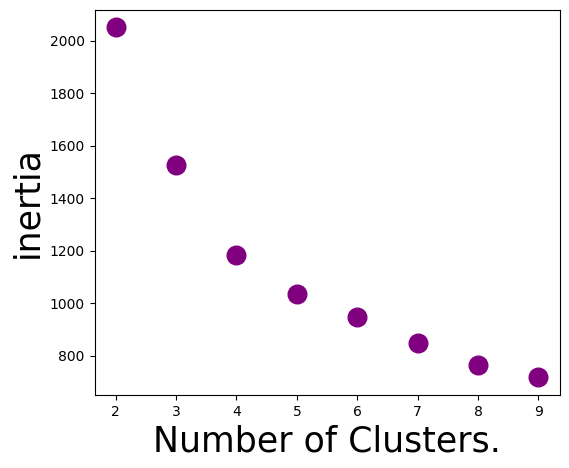

In [27]:
# Implementation of K-means.
inertias = []
for k in range(2, 10):
    kmeans_sampl = KMeans(n_clusters=k,n_init=10).fit(train_DataSetSampl_Stand.values)
    inertias.append(kmeans_sampl.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inertias, marker="o", s=180, color="purple")
plt.xlabel("Number of Clusters.", fontsize=25)
plt.ylabel("inertia", fontsize=25)
plt.show()

In [28]:
kmeans_DataSetSample = KMeans(n_clusters=5,n_init=10).fit(train_DataSetSampl_Stand.values)
kmeans_NOX_CO = KMeans(n_clusters=5,n_init=10).fit(train_DataSetSampl_Stand[['NOX','CO']].values)
kmeans_DataSetSample.inertia_

1036.1180253475666

## Cluster Visualization

With our models built, we assign clusters to their corresponding records in our dataset to compare the k-means clustering using all 7 variables with the k-means clustering using just the two variables, NOX and CO.


In [29]:
plotDataSet_NOX_CO = train_DataSetSampl_Stand.copy()
plotDataSet  = train_DataSetSampl_Stand.copy()
plotDataSet["cluster"]= kmeans_DataSetSample.labels_
plotDataSet_NOX_CO["cluster"]= kmeans_NOX_CO.labels_
plotDataSet

,O3,NO,NO2,NOX,SO2,CO,PM10,cluster
0,-0.904138,1.513024,0.154416,1.205329,0.691165,2.035660,0.470736,1
1,-0.904138,-0.429588,-0.731508,-0.541322,-0.800714,-0.709324,-0.798402,3
2,-1.015611,1.267407,1.099402,1.290118,0.193872,0.770170,0.842576,1
3,-0.458249,-0.541233,-1.085878,-0.744815,-0.800714,-0.923330,-0.859062,3
4,-0.904138,0.329594,0.863156,0.510060,0.193872,1.230629,1.768235,1
...,...,...,...,...,...,...,...,...
685,1.436783,-0.563561,-0.672447,-0.609153,0.691165,-0.499955,-0.610119,2
686,-0.959875,4.460436,0.922217,3.681165,2.680338,2.005529,0.897721,4
687,1.436783,-0.585890,-0.672447,-0.643068,1.188458,-0.409563,-0.495101,2
688,-0.904138,-0.027668,2.635005,0.747469,1.685751,1.444634,1.622493,1


Graph of our model where we trained it using only the two variables NOX and CO.


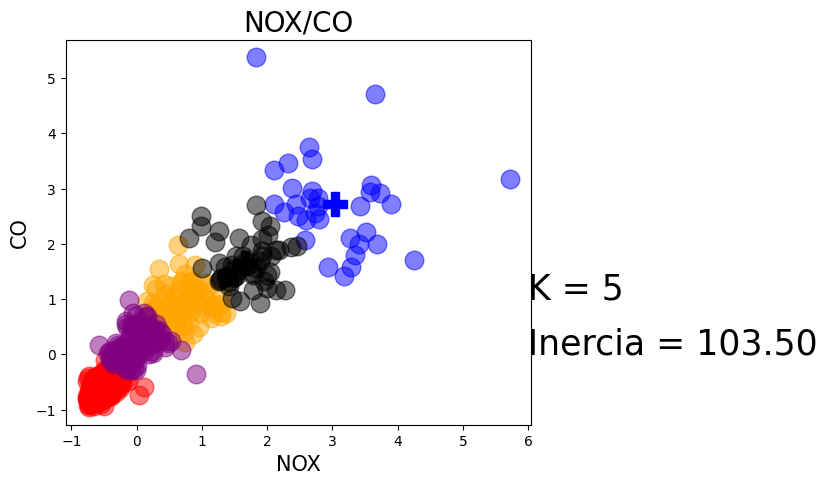

In [30]:
plt.figure(figsize=(6, 5), dpi=100)

colors = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans_NOX_CO.n_clusters):
    plt.scatter(plotDataSet_NOX_CO[plotDataSet_NOX_CO["cluster"] == cluster]["NOX"],
                plotDataSet_NOX_CO[plotDataSet_NOX_CO["cluster"] == cluster]["CO"],
                marker="o", s=180, color=colors[cluster], alpha=0.5)

    plt.scatter(kmeans_NOX_CO.cluster_centers_[cluster][0],
                kmeans_NOX_CO.cluster_centers_[cluster][1],
                marker="P", s=280, color=colors[cluster])

plt.title("NOX/CO", fontsize=20)
plt.xlabel("NOX", fontsize=15)
plt.ylabel("CO", fontsize=15)
plt.text(6, 1, "K = %i" % kmeans_NOX_CO.n_clusters, fontsize=25)
plt.text(6, 0, "Inercia = %0.2f" % kmeans_NOX_CO.inertia_, fontsize=25)
plt.show()

Graph of our model where we used all variables for training.

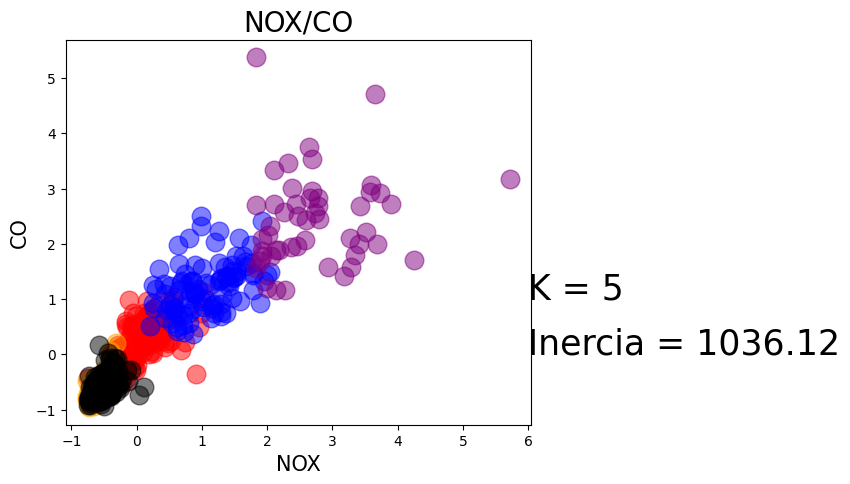

In [31]:
plt.figure(figsize=(6, 5), dpi=100)

colors = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans_DataSetSample.n_clusters):
    plt.scatter(plotDataSet[plotDataSet["cluster"] == cluster]["NOX"],
                plotDataSet[plotDataSet["cluster"] == cluster]["CO"],
                marker="o", s=180, color=colors[cluster], alpha=0.5)


plt.title("NOX/CO", fontsize=20)
plt.xlabel("NOX", fontsize=15)
plt.ylabel("CO", fontsize=15)
plt.text(6, 1, "K = %i" % kmeans_DataSetSample.n_clusters, fontsize=25)
plt.text(6, 0, "Inercia = %0.2f" % kmeans_DataSetSample.inertia_, fontsize=25)
plt.show()